In [1]:
  from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

df = pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#find missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().values.any()

False

In [6]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
number_of_elements = len(df['grade'])
print("Number of Elements", number_of_elements)


Number of Elements 21613


In [8]:
# mean value for prices 

df['price'].mean()


540088.1417665294

In [9]:
# median value for prices

df['price'].median()

450000.0

In [10]:
# mode value for prices

df['price'].mode()

0    350000.0
1    450000.0
dtype: float64

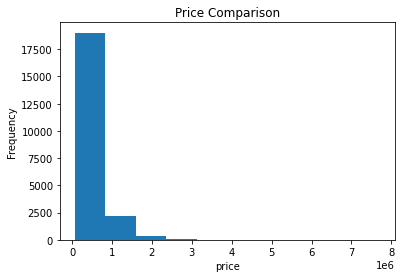

In [11]:
plt.title("Price Comparison")
plt.xlabel("price")
df['price'].plot.hist()

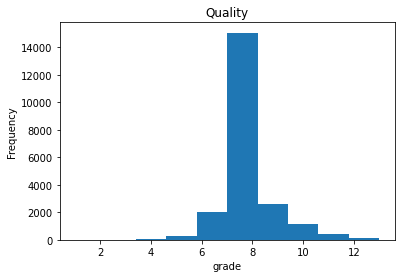

In [12]:
plt.title("Quality")
plt.xlabel("grade")
df['grade'].plot.hist()

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


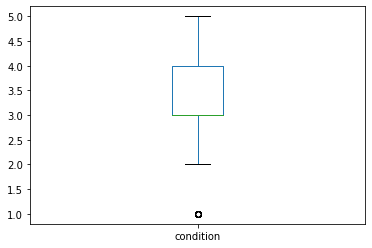

In [14]:
df["condition"].plot.box()
# I have tried grade, prices, and bedrooms but all plots were coming to small not able to look and understand. 
#I was just trying to see how different plots looked and only condition one looked good.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


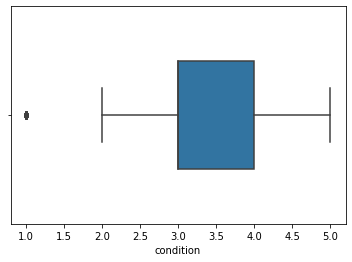

In [15]:
sns.boxplot(df["condition"], width=0.5)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
# Write a paragraph selecting the most important features (feature selection)

''' The important features or variables in this dataset will be price, bedrooms, sqft_living, floors, condition, and grade. The most important one in these is sqft_living. 
Why these variables are important because anyone looking to buy a house or a flat will need to compare if the living space is enough for a person to live there. 
Price and condition are another important features because a person needs to see if the are paying the correct amount and getting the right house in that condition. 
''' 

' The important features or variables in this dataset will be price, bedrooms, sqft_living, floors, condition, and grade. The most important one in these is sqft_living. \nWhy these variables are important because anyone looking to buy a house or a flat will need to compare if the living space is enough for a person to live there. \nPrice and condition are another important features because a person needs to see if the are paying the correct amount and getting the right house in that condition. \n'

In [19]:
# Split your dataset into a training set and a testing set


y = df["price"]
x = df["sqft_living"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

x_train

12826    3910
6410     1660
15417    1190
16882    2430
8467     1490
         ... 
1099      720
18898    1820
11798    3440
6637      870
2575     2820
Name: sqft_living, Length: 19451, dtype: int64

In [20]:
x_test

6638     2410
7366     2170
3158     1450
9117     4500
3392      860
         ... 
3823     2610
3268     2360
19051    1040
1486     2000
10955    1920
Name: sqft_living, Length: 2162, dtype: int64

In [21]:
y_train

12826    1749000.0
6410      315000.0
15417     375000.0
16882     524000.0
8467      207000.0
           ...    
1099      151000.0
18898     325000.0
11798     905000.0
6637      313000.0
2575      690000.0
Name: price, Length: 19451, dtype: float64

In [22]:
y_test

6638      735000.0
7366     1150000.0
3158      350500.0
9117      860000.0
3392      122000.0
           ...    
3823      294950.0
3268      732000.0
19051     299000.0
1486      229950.0
10955     571000.0
Name: price, Length: 2162, dtype: float64

In [23]:

x=df["sqft_living"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1) 

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 82626313880.00388
R squared 0.48489043226442774


In [24]:
r_sq = model.score(x, y) #this is to obtain coefficient of determinitation
print('coefficient of determination:', r_sq)

coefficient of determination: 0.492826220967243


In [25]:
print('intercept:', model.intercept_) # 1st atrribute of model 

intercept: -39733.206965057645


In [26]:
print('slope:', model.coef_) # 2nd attribute of model

slope: [278.58913016]


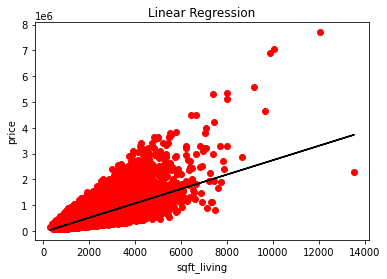

In [27]:
#plotting linear regression 
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [28]:

print(x)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [30]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [31]:
X = df[['sqft_living', 'bedrooms']]

print(X)

       sqft_living  bedrooms
0             1180         3
1             2570         3
2              770         2
3             1960         4
4             1680         3
...            ...       ...
21608         1530         3
21609         2310         4
21610         1020         2
21611         1600         3
21612         1020         2

[21613 rows x 2 columns]


In [43]:
# multi linear regression
X=df[["sqft_living","bedrooms"]].values
y=df["price"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2) 

model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68734380240.16434
R squared 0.5296204617013147


In [47]:
# polynomial regression

X=df[["sqft_living","bedrooms"]].values
y=df["price"].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

X_train_fit = poly.fit_transform(X_train) #transforming our input data
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  65456139227.1545
R squared:  0.5520549040974407


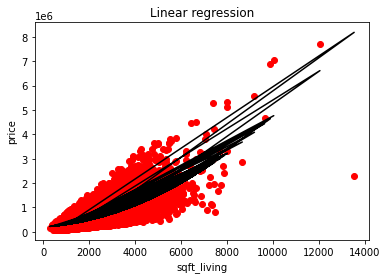

In [49]:
# polynomial regression plotting
X= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y) 

lg=LinearRegression()
lg.fit(X_poly, y) 

plt.scatter(X, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(X, lg.predict(poly.fit_transform(X)), color="k")